# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
all_data=pd.merge(mouse_metadata,study_results,on='Mouse ID',how='inner')


# Display the data table for preview
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice=all_data["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID=all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data= all_data.loc[all_data["Mouse ID"] == "g989", :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = all_data[all_data['Mouse ID'].isin(duplicate_ID)==False]
unique_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats=unique_df['Tumor Volume (mm3)'].groupby(unique_df['Drug Regimen']).describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_2=unique_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice')

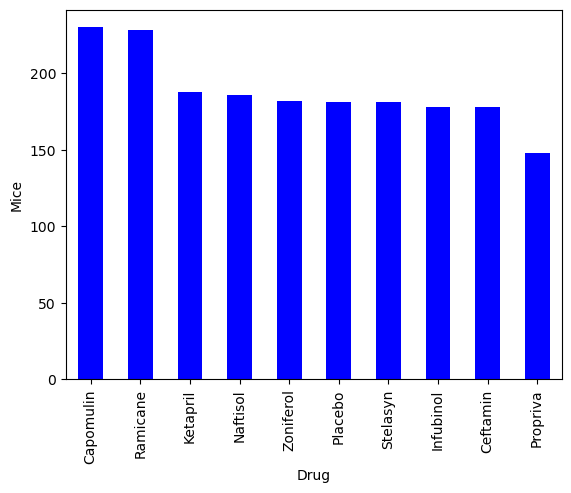

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#count number of mice by drug regimen
regimen_count=unique_df["Drug Regimen"].value_counts()

#Create chart
pandas_chart=regimen_count.plot.bar(color='blue')

#Axis labels
plt.xlabel("Drug")
plt.ylabel("Mice")



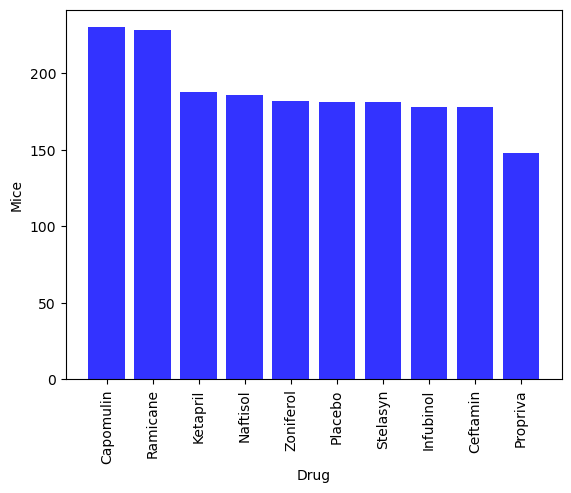

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = regimen_count.index.values
y_axis = regimen_count.values

pyplot_chart=plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.xlabel("Drug")
plt.ylabel("Mice")
plt.xticks(rotation="vertical")

plt.show()


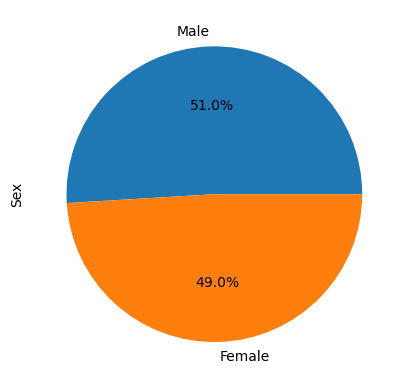

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count=unique_df["Sex"].value_counts()

pandas_pie=gender_count.plot.pie(autopct= "%1.1f%%")

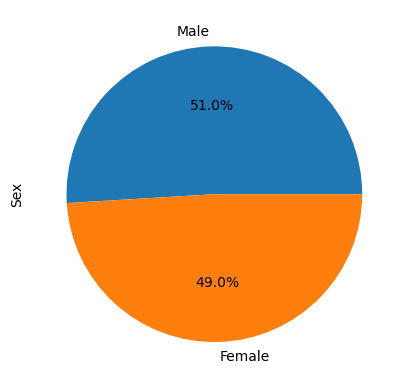

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=unique_df["Sex"].value_counts()

pyplot_pie=gender_count.plot.pie(autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Filter out undesired drugs and choose max time point

last_point_df = all_data[["Mouse ID","Drug Regimen","Timepoint"]].loc[all_data["Drug Regimen"] \
                .isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])].groupby(["Mouse ID","Drug Regimen"]).max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_vol_df=all_data.merge(last_point_df,on=["Timepoint","Mouse ID","Drug Regimen"]) \
        .loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]].set_index(["Drug Regimen"]).sort_index()

tumor_vol_df

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,j246,38.753265
Capomulin,v923,40.658124
Capomulin,w150,39.952347
Capomulin,j119,38.125164
Capomulin,l509,41.483008
...,...,...
Ramicane,r921,43.419381
Ramicane,w678,43.166373
Ramicane,y449,44.183451


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
plot_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
IQR = tumor_vol_df.groupby(["Drug Regimen"]).quantile([.25,.75],numeric_only=True)
for drug in regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    plot_df = tumor_vol_df.loc[drug]
    
    # add subset
    plot_list.append(plot_df["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    lower_q = IQR["Tumor Volume (mm3)"].loc[(drug,0.25)]
    upper_q = IQR["Tumor Volume (mm3)"].loc[(drug,0.75)]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    outliers = plot_df["Tumor Volume (mm3)"].loc[(plot_df["Tumor Volume (mm3)"] < lower_bound) | \
                              (plot_df["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{drug}: {outliers}")
    

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: Drug Regimen
Infubinol    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


ValueError: Dimensions of labels and X must be compatible

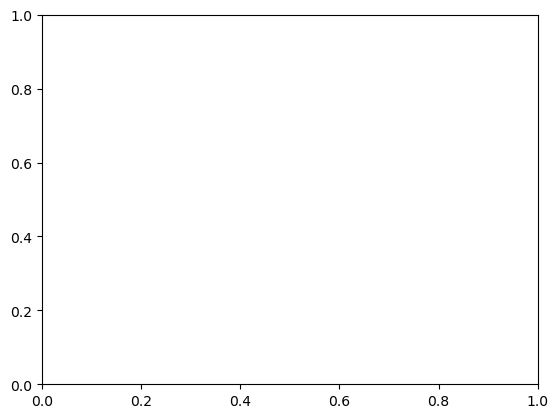

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(plot_df,labels=regimen_list,sym="ro")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume for Different Treatment Drugs")
plt.show()

## Line and Scatter Plots

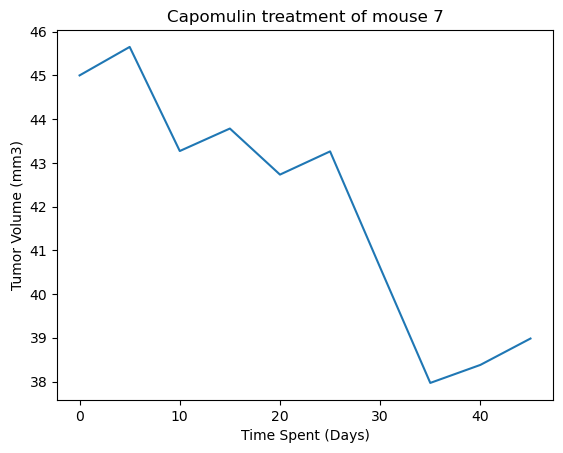

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_days = all_data["Timepoint"].loc[(all_data["Drug Regimen"]=="Capomulin")\
                                              &(all_data["Mouse ID"]=="b128")]
y_volume = all_data["Tumor Volume (mm3)"].loc[(all_data["Drug Regimen"]=="Capomulin")\
                                              &(all_data["Mouse ID"]=="b128")]
plt.plot(x_days,y_volume)
plt.xlabel("Time Spent (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 7")
plt.show()

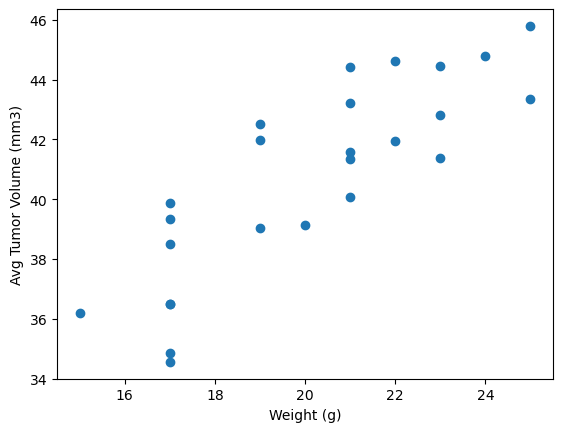

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Axis
x_weight = all_data.loc[(all_data["Drug Regimen"]=="Capomulin")]\
                                .groupby(["Mouse ID"]).mean(numeric_only=True)["Weight (g)"]
y_avg_vol = all_data.loc[(all_data["Drug Regimen"]=="Capomulin")]\
                                .groupby(["Mouse ID"]).mean(numeric_only=True)["Tumor Volume (mm3)"]

#Plotting
plt.scatter(x_weight,y_avg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Mouse weight/avg. tumor volume correlation: 0.84


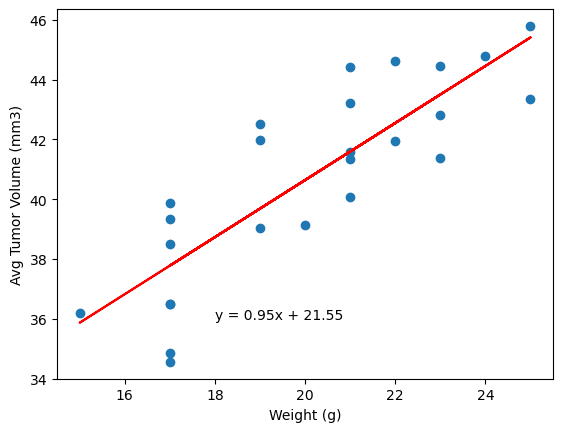

In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_weight,y_avg_vol)
print(f"Mouse weight/avg. tumor volume correlation: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_avg_vol)
regress_values = x_weight * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight,y_avg_vol)
plt.plot(x_weight,regress_values,"r-")
plt.annotate(equation,(18,36))
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()